# Lab 4: Gradient Descent | Linear Regression

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **4BSc DS A** <br>

---------------

### `Objective`: 

Use necessary visualisations, plots, and other relevant factors to prove that the model's loss is converging to the minima. Check whether the number of iterations (epochs) or learning rate change the way in which the algorithm is trained. Compare the trained model with any OLS based linear regression model and comment on your learnings.  

_ADDITIONAL_: Implement Multiple Linear Regression based on Gradient Descent. Once done, fit the Boston House Prices dataset using the user-defined functions that you created. Once done, compare it with any OLS based model, and provide your comments.

### `Probelm Definition`:  
Implement Linear Regression with Gradient Descent.

### `Observations`:  
1. While tuning weight during performing Gradient Descent in Simple Linear Regression, we observe that the loss-graph remains same throughout the different weights but both bias and weight is not affected (their nature of converging to constant doesn't change).  
2. While tuning bias during performing Gradient Descent in Simple Linear Regression, we observe that both loss-graph and bias shift to strictly constant after as the bias increases but weight is not affected (their nature of converging to constant doesn't change).  
3. As the alpha increases or decreases from it's ideal number, the accuracy of the model reduces.
4. Epoch and Accuracy of the model are inversely proportional to each other.

### `References`:  
1. StackOverflow  
2. GeekforGeeks  
3. Numpy API  
4. Pandas API

### `Code`:

In [1]:
# importing all the necessary libraries / modules
import pandas as pd
import numpy as np
import pickle
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from krishKiLibrary import Rand #user-defined function for generating random nos between a range

In [2]:
# Loading the boston housing dataset onto python
boston = load_boston()
df = pd.DataFrame(data = boston. data, columns = [boston.feature_names]) # converting array into dataframes
df['MEDV'] = boston.target # adding the target variable to the dataframe

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Change: $\delta b = \frac{\partial J}{\partial b} = \frac{1}{n} \sum (wx_i + b - y_i)$

In [4]:
# Creating a user-defined function for the equation above
def delB(w, X, b, y):
    if len(w) == 1:
        del_ = 0
        n = len(X)

        for i in range(0, n):
            equation = ((w*X[i] + b)- y[i])
            del_ +=  equation
        del_ /= n

        return del_
    else:
        del_ = 0
        n = len(X)

        for i in range(0, n):
            equation = ((w[i]*X[i] + b)- y[i])
            del_ +=  equation
        del_ /= n

        return del_

#### Change: $\delta w = \frac{\partial J}{\partial w} = \frac{1}{n} \sum (wx_i + b - y_i) * x_i$

In [5]:
# Creating a user-defined function for the equation above
def delW(w, X, b, y):
    if len(w) == 1:
        del_ = 0
        n = len(X)

        for i in range(0, n):
            equation = ((w*X[i] + b) - y[i]) * X[i]
            del_ += equation
        del_ /= n

        return del_
    else:
        del_ = 0
        n = len(X)

        for i in range(0, n):
            equation = ((w[i]*X[i] + b) - y[i]) * X[i]
            del_ += equation
        del_ /= n

        return del_

#### Loss Function: $J(w, b) = \frac{1}{2n} \sum (y_i - (wx_i + b))^2$

In [6]:
# Creating a user-defined function for the equation above
def calcLoss(w, X, b, y):
    if len(w) == 1:
        loss = 0
        n = len(X)

        for i in range(0, n):
            equation = ((w*X[i] + b) - y[i])**2
            loss += equation

        return loss/(2*n)
    else:
        loss = 0
        n = len(X)

        for i in range(0, n):
            equation = ((w[i]*X[i] + b) - y[i])**2
            loss += equation

        return loss/(2*n)

#### Gradient Descent

In [7]:
def gradientDescent(X, y, w, b, epoch, alpha, smp_lr_reg=True):
    if smp_lr_reg == True:
        X = MinMaxScaler().fit_transform(X)
        y = MinMaxScaler().fit_transform(y)
        
        loss_array = []
        w_array = []
        b_array = []
        
        print("No of Data Points: {}".format(len(X)))
        print("Initial Parameters: w = {}, b = {}".format(w, b))
        print("Hyper Parameters: alpha = {}, epochs = {}".format(alpha, epoch))
        print("-"*30)
        
        for epoch_ in range(epoch):
            loss = calcLoss(w, X, b, y)

            loss_array.append(loss[0])
            w_array.append(w[0])
            b_array.append(b[0])

            w = w - alpha * delW(w, X, b, y)
            b = b - alpha * delB(w, X, b, y)
        
        font1 = {'family':'serif','color':'blue','size':20}

        fig, (ax1, ax2,ax3) = plt.subplots(1,3 ,figsize=(10, 3))

        ax1.plot(loss_array)
        ax1.set_title("Loss", fontdict = font1)

        ax2.plot(b_array)
        ax2.set_title("Bias", fontdict = font1)

        ax3.plot(w_array)
        ax3.set_title("Weight", fontdict = font1)
    
    else:
        print("Hi")

##### Changing weight

No of Data Points: 506
Initial Parameters: w = [100], b = [1]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


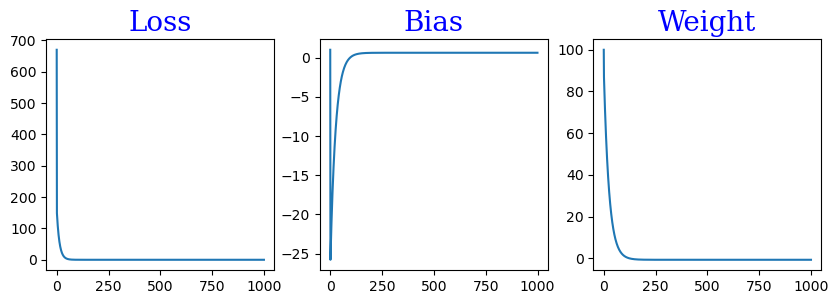

In [8]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1], 1000, 1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [50], b = [1]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


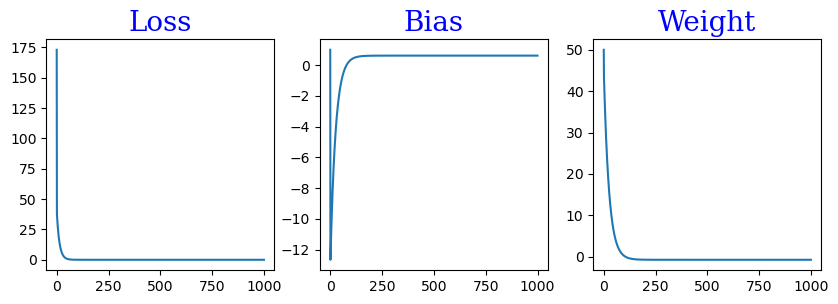

In [20]:
gradientDescent(df['LSTAT'], df['MEDV'], [50], [1], 1000, 1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [-50], b = [1]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


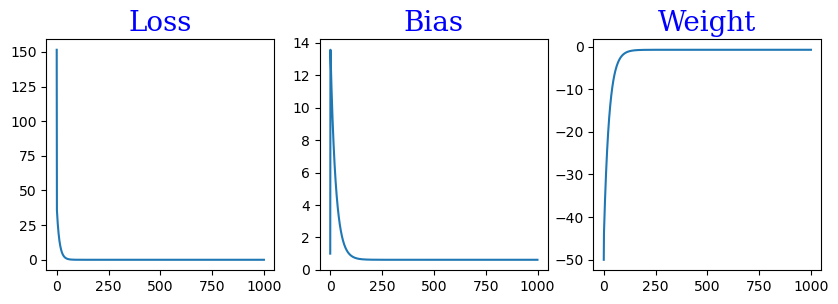

In [23]:
gradientDescent(df['LSTAT'], df['MEDV'], [-50], [1], 1000, 1, smp_lr_reg=True)

#### Changing Bias

No of Data Points: 506
Initial Parameters: w = [100], b = [1]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


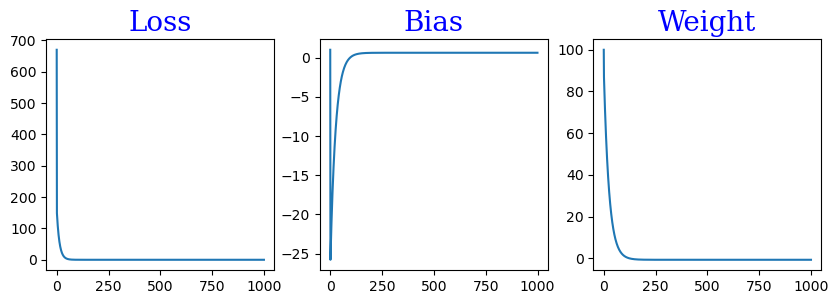

In [26]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1], 1000, 1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [10]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


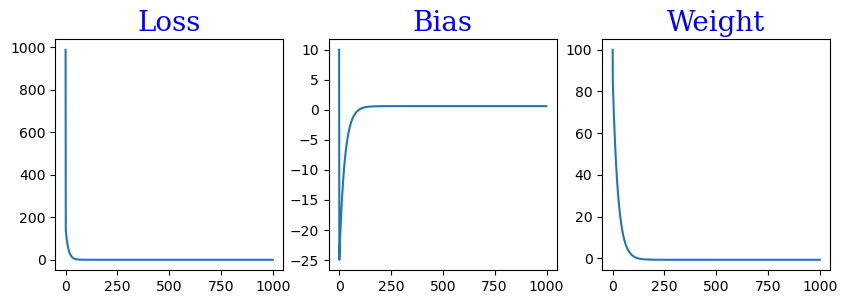

In [27]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [10], 1000, 1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [100]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


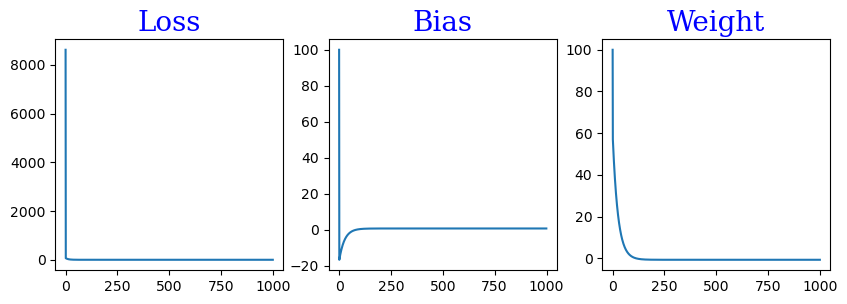

In [28]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [100], 1000, 1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [1000]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


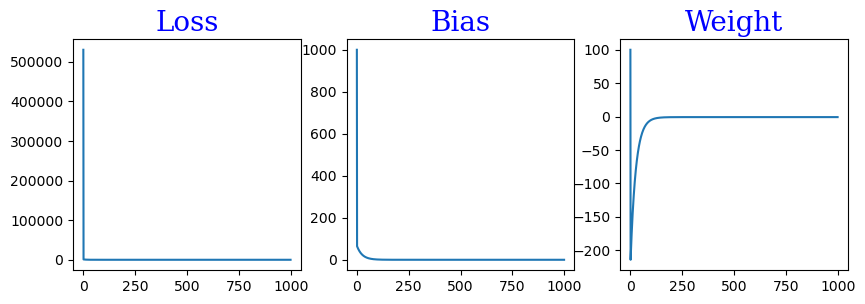

In [29]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1000], 1000, 1, smp_lr_reg=True)

##### Changing alpha

gradientDescent(X, y, w, b, epoch, alpha, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [1]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


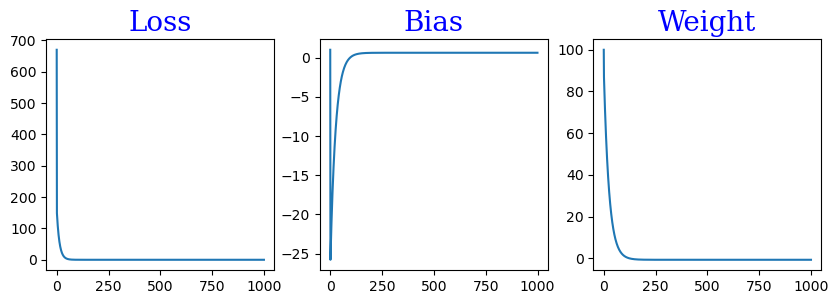

In [31]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1], 1000, 1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [1]
Hyper Parameters: alpha = 3, epochs = 1000
------------------------------


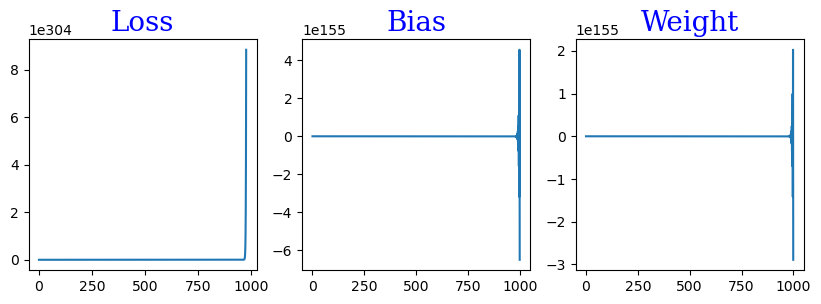

In [32]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1], 1000, 3, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [1]
Hyper Parameters: alpha = 0.1, epochs = 1000
------------------------------


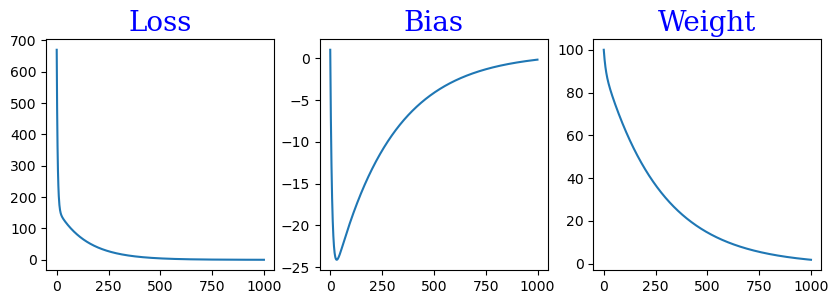

In [33]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1], 1000, 0.1, smp_lr_reg=True)

No of Data Points: 506
Initial Parameters: w = [100], b = [1]
Hyper Parameters: alpha = 0.01, epochs = 1000
------------------------------


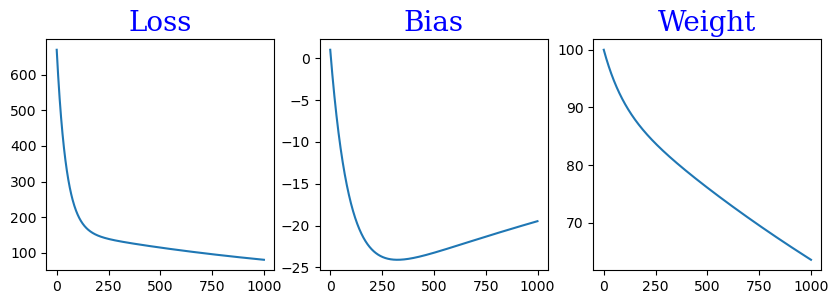

In [34]:
gradientDescent(df['LSTAT'], df['MEDV'], [100], [1], 1000, 0.01, smp_lr_reg=True)

### Mean Absolute Error

In [77]:
def mae(X, y, w, b):
    n = len(X)
    mae_ = 0
    
    for i in range(n):
        iteration = abs((w*X[i] + b) - y[i])
        mae_ += iteration
        
    return mae_/n

In [78]:
X = MinMaxScaler().fit_transform(df['LSTAT'])
y = MinMaxScaler().fit_transform(df['MEDV'])
b = 1
w = 10

In [79]:
mae(X, y, w, b)

array([3.62447238])

#### Attempt to Gradient Descent in Multiple Linear Regression

In [45]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']
w = Rand(-100, 100, len(df.columns))
b = [1]
epoch = 1000
alpha = 1

In [16]:
df.iloc[0][0]

0.00632

In [17]:
df.columns[0][0]

'CRIM'

In [18]:
X.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [13]:
loss_array = []
w_array = []
b_array = []

print("No of Data Points: {}".format(len(X)))
print("Initial Parameters: w = {}, b = {}".format(w, b))
print("Hyper Parameters: alpha = {}, epochs = {}".format(alpha, epoch))
print("-"*30)

for epoch_ in range(epoch):
    for w_ in range(len(w)):
        for j in range(len(X)):
            loss = calcLoss(w[w_], X.iloc[j][w_], b, y.iloc[j][w_])

            loss_array.append(loss[0])
            w_array.append(w[w_])
            b_array.append(b[0])

            w[w_] = w[w_] - alpha * delW(w[w_], X[j][w_], b, y.iloc[j][w_])
            b = b - alpha * delB(w[w_], X.iloc[j][w_], b, y.iloc[j][w_])

No of Data Points: 506
Initial Parameters: w = [91, -38, 64, -80, -1, 89, 97, -65, 34, -62, -73, -55, -98, -1], b = [1]
Hyper Parameters: alpha = 1, epochs = 1000
------------------------------


TypeError: object of type 'int' has no len()